In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Load training and testing text file
Data_train = np.loadtxt('training_data.txt', skiprows = 1)
X_train = Data_train[:, 1:]
y_train = Data_train[:, 0]
X_test = np.loadtxt("test_data.txt", skiprows = 1)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

# Normalize training and testing data
for i in range(len(X_train[0])):
    col = X_train[:, i]
    mean = np.mean(col)
    std = np.std(col)
    X_train[:, i] = (col - mean) / std
    X_test[:, i] = (X_test[:, i] - mean) / std

print('Normalized')

X_train shape: (20000, 1000)
y_train shape: (20000,)
X_test shape: (10000, 1000)
Normalized


In [21]:
tuned_parameters = {'n_estimators': [1, 10, 20]}
clf = GridSearchCV(AdaBoostClassifier(LogisticRegression()), tuned_parameters, scoring = 'accuracy')
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.84415
{'n_estimators': 10}


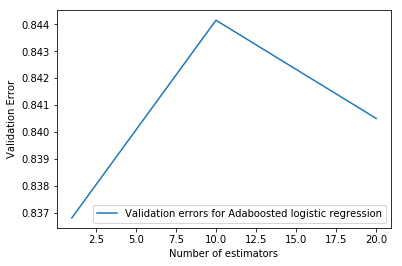

In [25]:
import matplotlib.pyplot as plt
E_vals = clf.cv_results_['mean_test_score']
plt.plot([1, 10, 20], E_vals, label = "Validation errors for Adaboosted logistic regression")
plt.xlabel("Number of estimators")
plt.ylabel("Validation Error")
plt.legend()
plt.show()

In [23]:
print(E_vals)

[ 0.8368   0.84415  0.8405 ]
